In [1]:
from numpy import eye, unique, diff, repeat, tile, fromfunction, array, vectorize, linspace, dot, sin, pi
from numpy.linalg import solve
from matplotlib.pyplot import plot, show, rcParams
from scipy.interpolate import splrep, PPoly
from numpy.polynomial.legendre import leggauss
from math import floor
from itertools import product

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = (6.4, 4.8)
rcParams['figure.dpi'] = 100

In [3]:
# step 1

def F(eta):
    
    return eta*(2.0+eta*(4.0*eta-6.0))

def compute_basis_functions(support_points, degree):
    ndofs = len(support_points)
    poly = lambda v: PPoly.from_spline(splrep(support_points, v, k=degree))
    
    return [poly(e) for e in eye(ndofs)]

def compute_global_quadrature(poly, k):
    knots = unique(poly.x)
    n = len(knots)
    
    hs = diff(knots)
    xs, ws = leggauss(k)
    ws = tile(ws / 2.0, n - 1) * repeat(hs, k)
    xs = repeat(knots[:-1], k) + tile((xs + 1.0) / 2.0, n - 1) * repeat(hs, k)
    
    return xs, ws

def compute_system_matrices(basis, xs, ws):
    inner_prod = lambda f, g: dot(f(xs), ws * g(xs))
    tomatrix = lambda f: fromfunction(vectorize(f), (len(basis), len(basis)), dtype=int)
    
    M = tomatrix(lambda i, j: inner_prod(basis[i], basis[j]))
    K = tomatrix(lambda i, j: inner_prod(basis[i].derivative(1), basis[j].derivative(1)))
    
    return M, K

In [4]:
# step 2

def eta_iterator(eta, A, M, dt):
    t = 0.0
    while t < 1.0:
        yield eta
        t += dt
        eta = solve(A, M.dot(eta - dt * F(eta)))
        
def solve_allen_cahan(eta0, eps, dt, ndofs, degree):
    qs     = linspace(0.0, 1.0, ndofs + 1)
    basis  = compute_basis_functions(qs, degree)
    xs, ws = compute_global_quadrature(basis[0], int(floor((degree + 1) / 2)))
    M, K   = compute_system_matrices(basis, xs, ws)
    eta0   = eta0(qs)
    A      = M + eps**2 * dt * K
    eta    = list(eta_iterator(eta0, A, M, dt))
        
    return eta, basis

def plot_solution(eta, basis, stride, resolution):
    eta = [cs for (n, cs) in enumerate(eta) if ((n % stride == 0) or (n == len(eta) - 1)) and n != 0]
    xs  = linspace(0.0, 1.0, resolution)
    B   = array([e(xs) for e in basis])
    
    for cs in eta:
        plot(xs, B.T.dot(cs))
        

(0.01, 0.25, 16, 1)


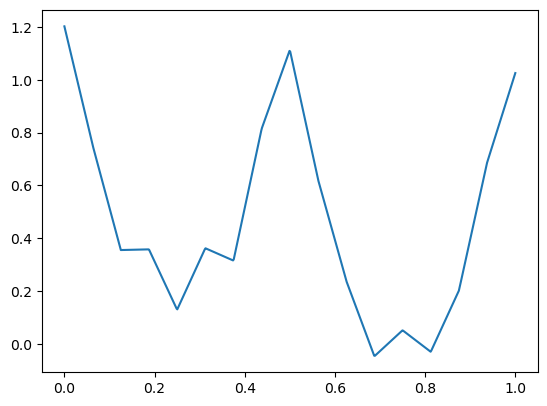

(0.01, 0.25, 16, 2)


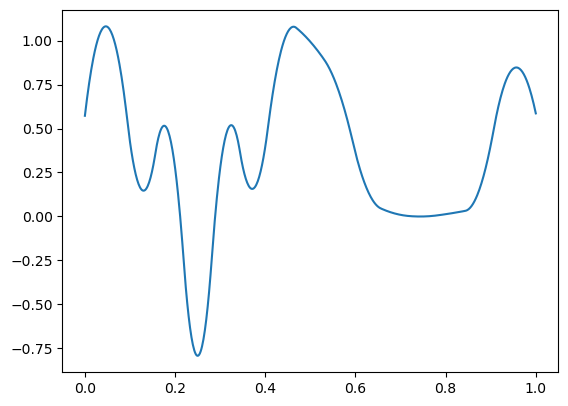

(0.01, 0.25, 16, 3)


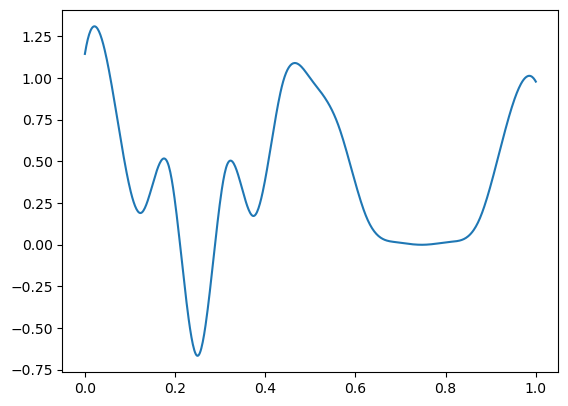

(0.01, 0.25, 32, 1)


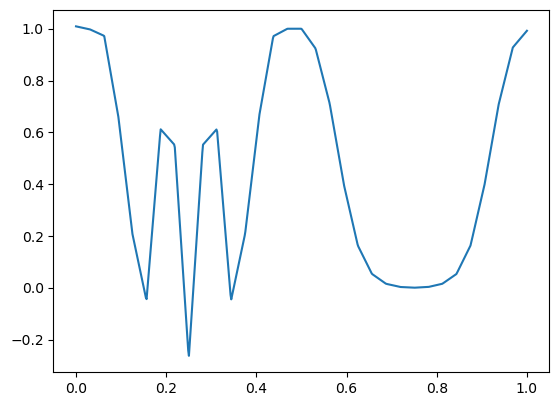

(0.01, 0.25, 32, 2)


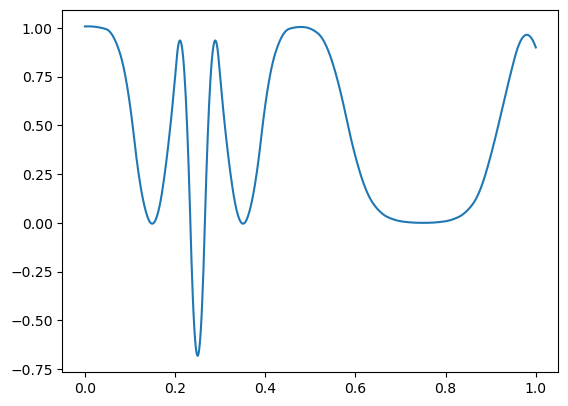

(0.01, 0.25, 32, 3)


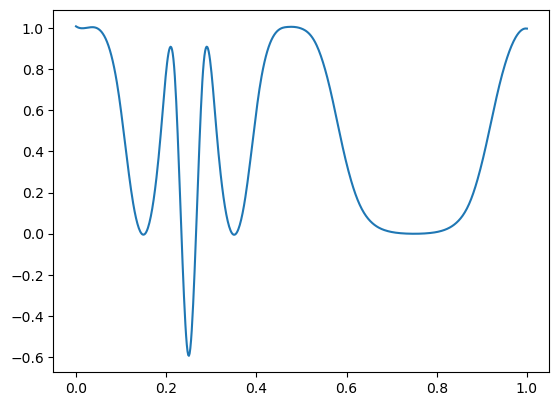

(0.01, 0.25, 64, 1)


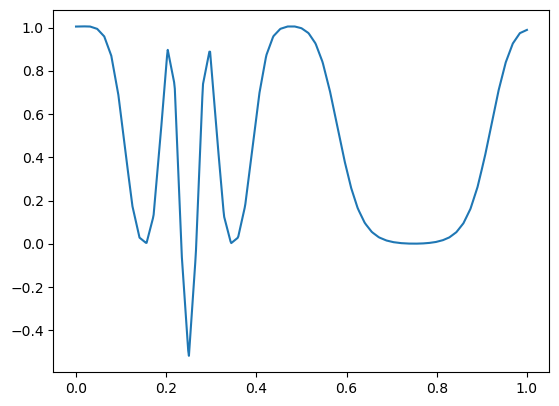

(0.01, 0.25, 64, 2)


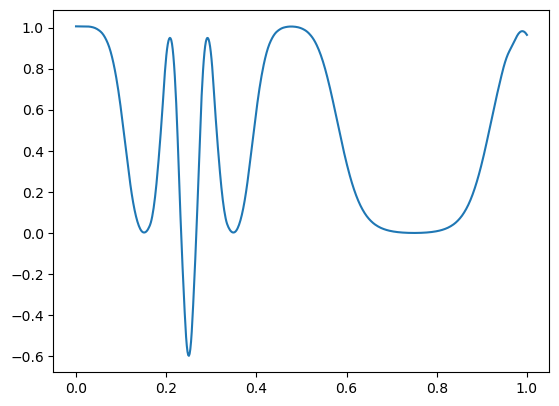

(0.01, 0.25, 64, 3)


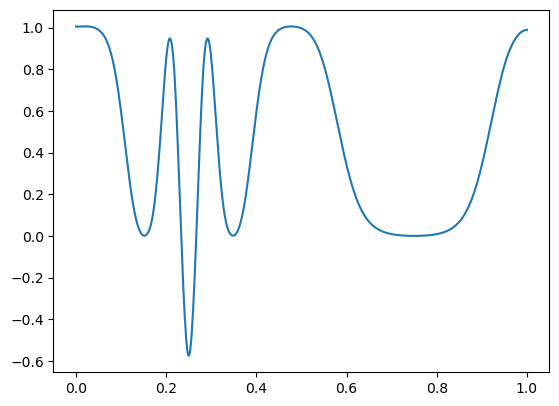

(0.01, 0.25, 128, 1)


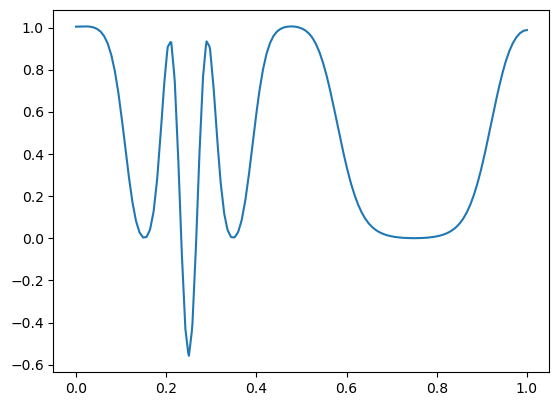

(0.01, 0.25, 128, 2)


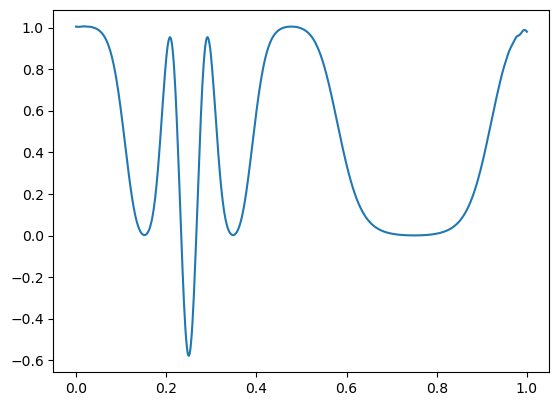

(0.01, 0.25, 128, 3)


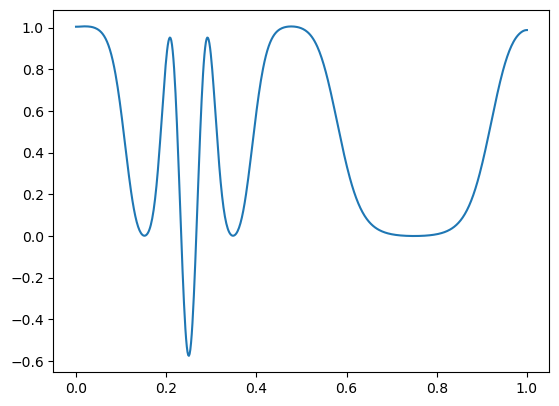

(0.01, 0.125, 16, 1)


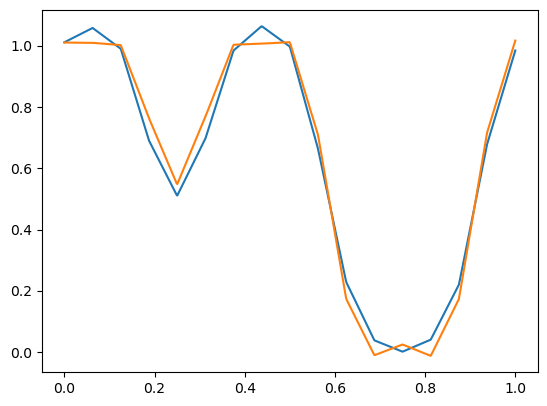

(0.01, 0.125, 16, 2)


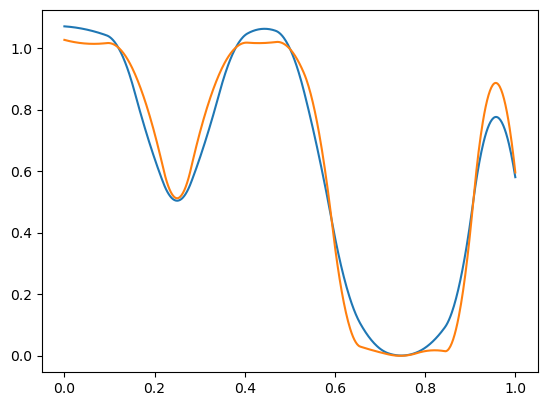

(0.01, 0.125, 16, 3)


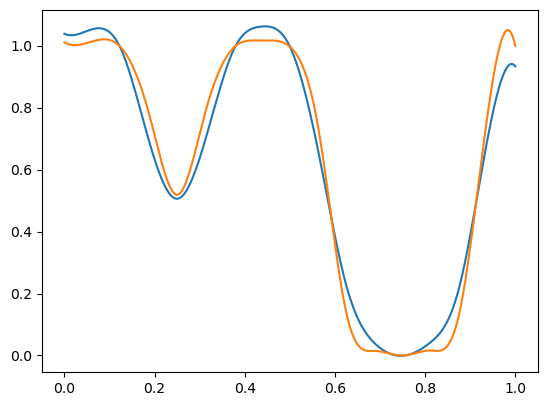

(0.01, 0.125, 32, 1)


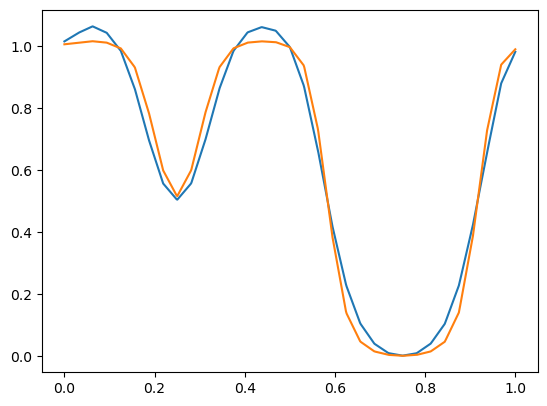

(0.01, 0.125, 32, 2)


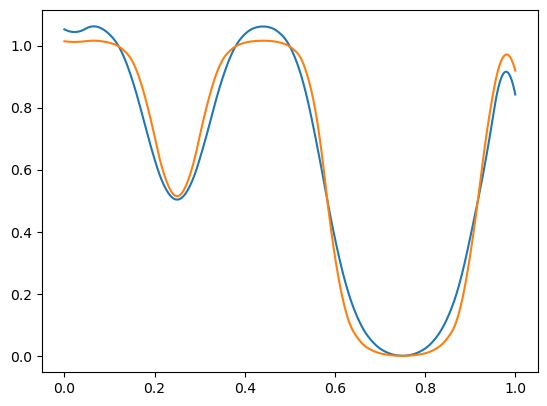

(0.01, 0.125, 32, 3)


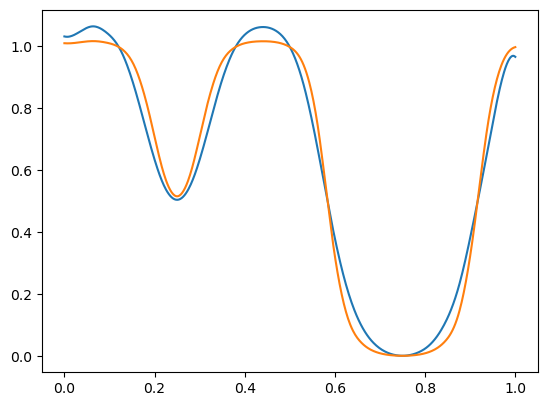

(0.01, 0.125, 64, 1)


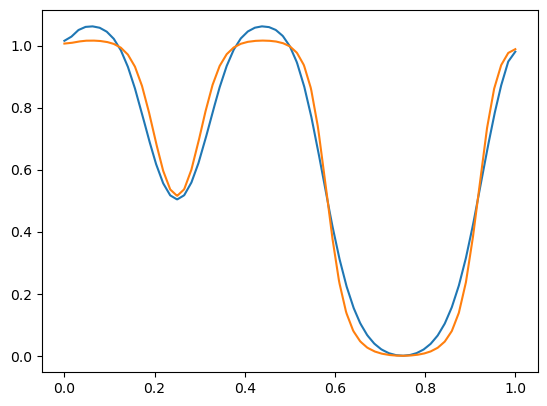

(0.01, 0.125, 64, 2)


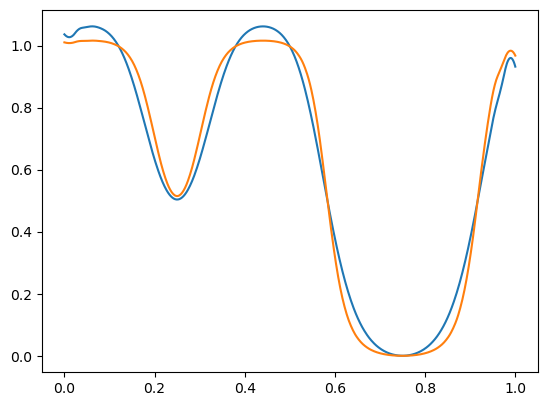

(0.01, 0.125, 64, 3)


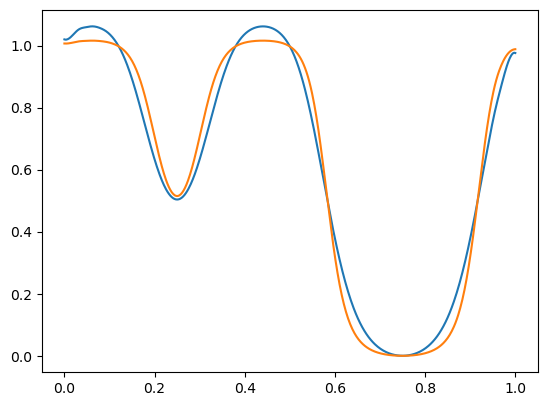

(0.01, 0.125, 128, 1)


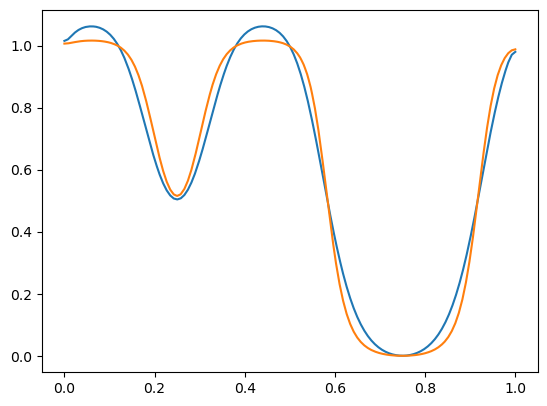

(0.01, 0.125, 128, 2)


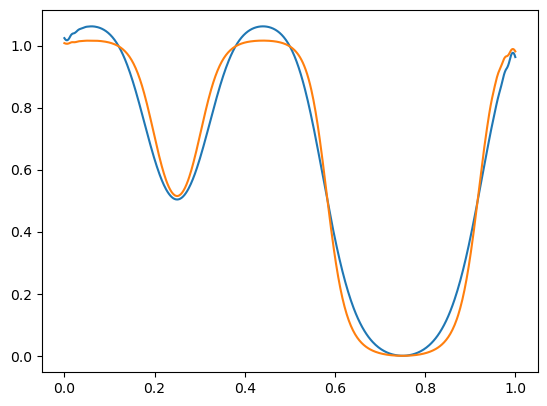

(0.01, 0.125, 128, 3)


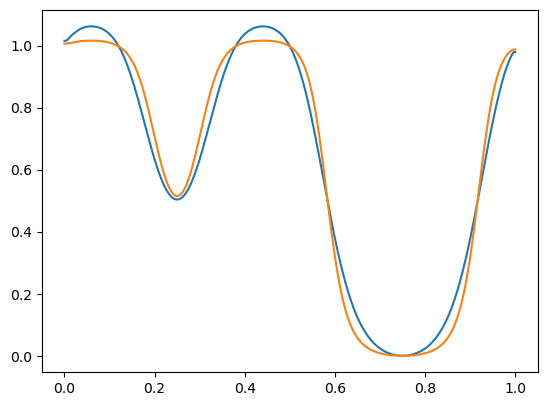

(0.01, 0.0625, 16, 1)


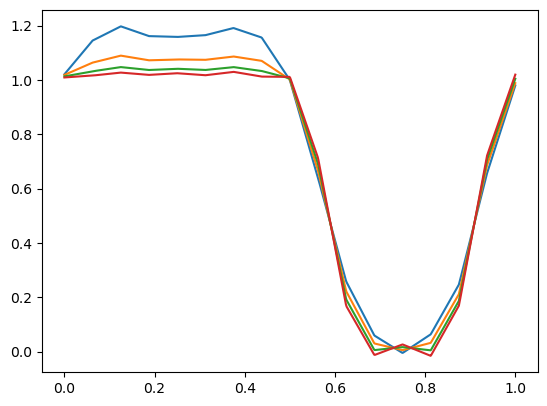

(0.01, 0.0625, 16, 2)


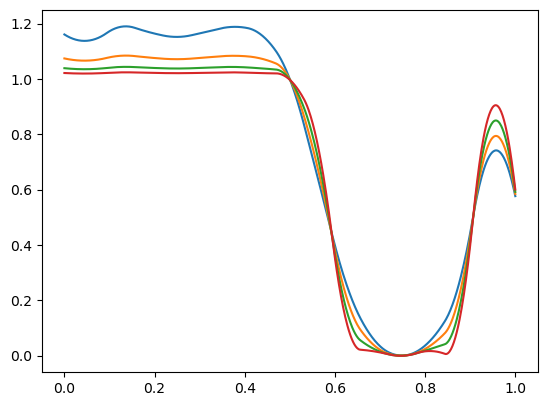

(0.01, 0.0625, 16, 3)


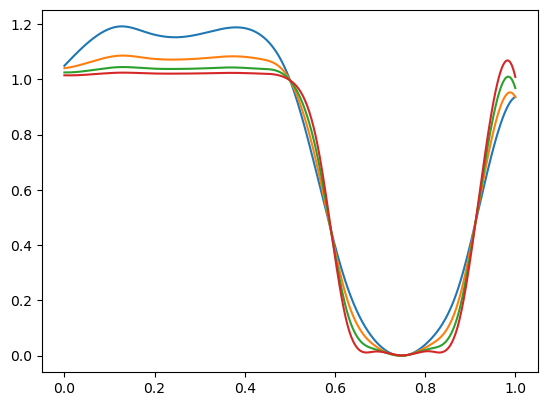

(0.01, 0.0625, 32, 1)


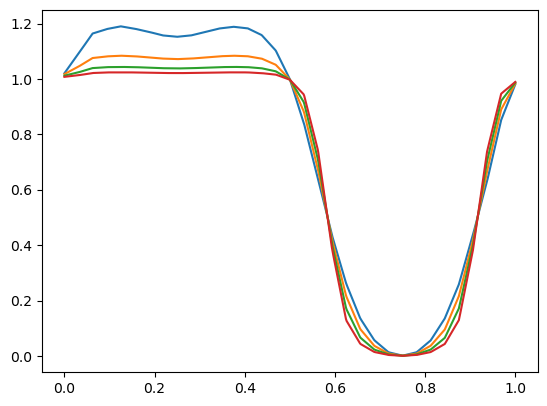

(0.01, 0.0625, 32, 2)


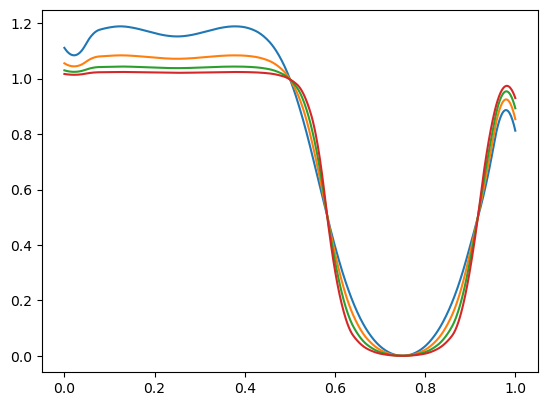

(0.01, 0.0625, 32, 3)


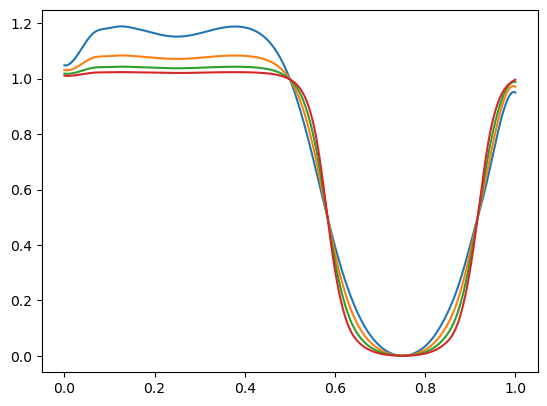

(0.01, 0.0625, 64, 1)


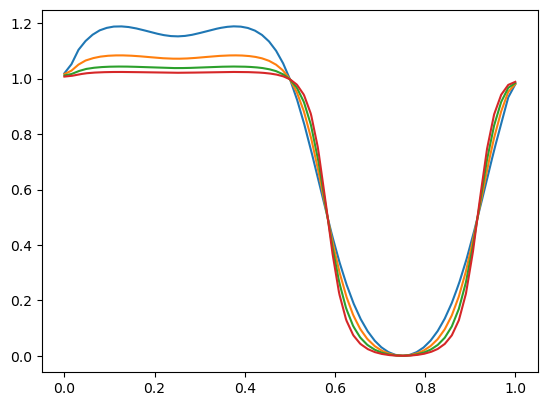

(0.01, 0.0625, 64, 2)


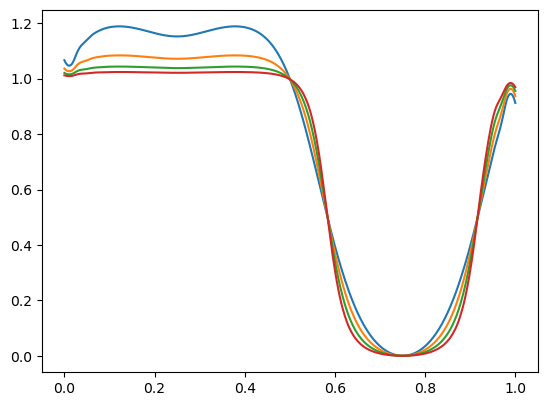

(0.01, 0.0625, 64, 3)


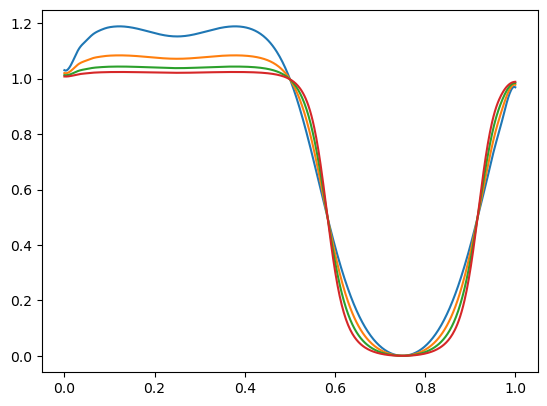

(0.01, 0.0625, 128, 1)


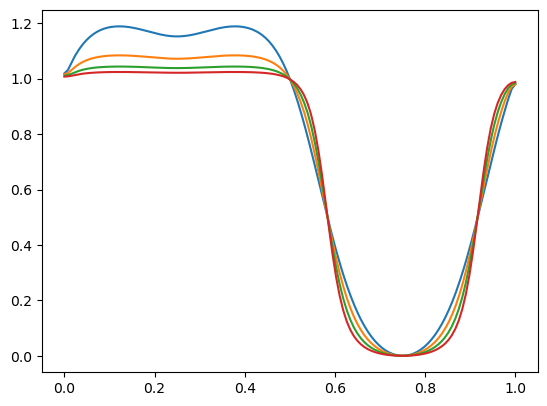

(0.01, 0.0625, 128, 2)


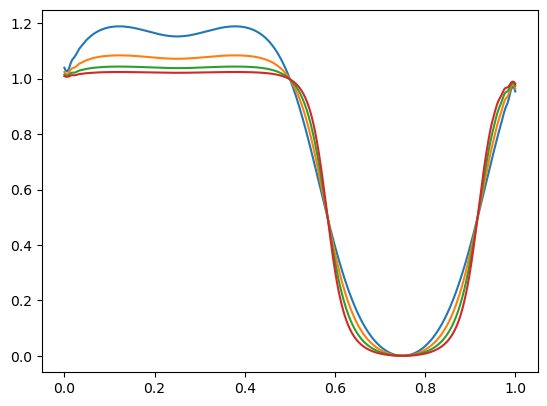

(0.01, 0.0625, 128, 3)


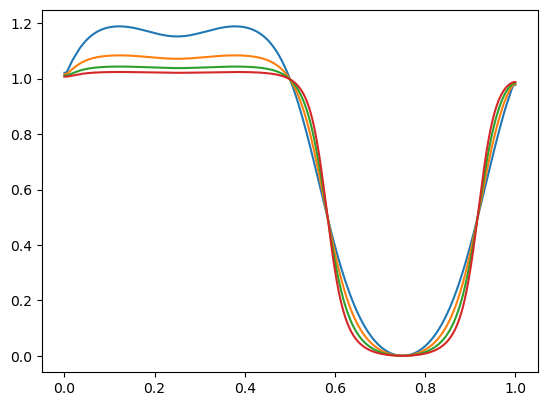

(0.01, 0.03125, 16, 1)


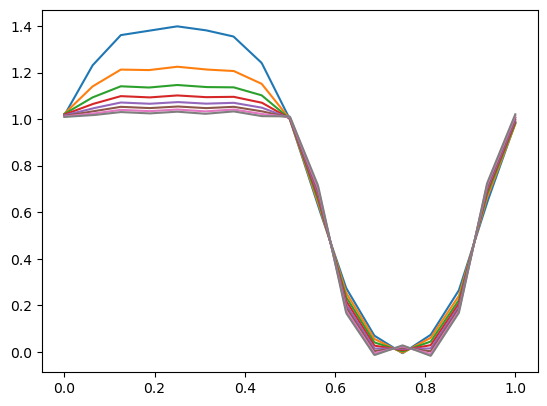

(0.01, 0.03125, 16, 2)


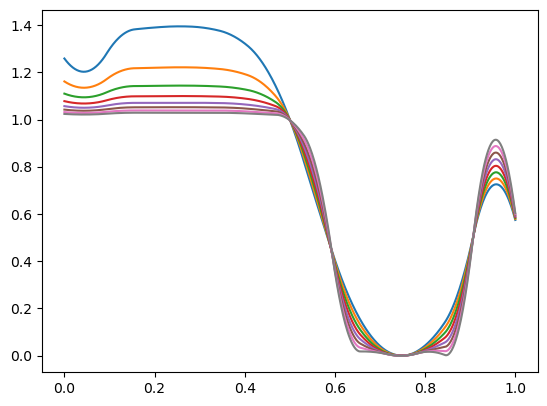

(0.01, 0.03125, 16, 3)


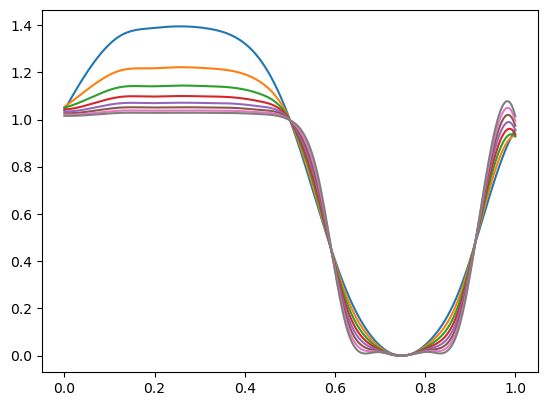

(0.01, 0.03125, 32, 1)


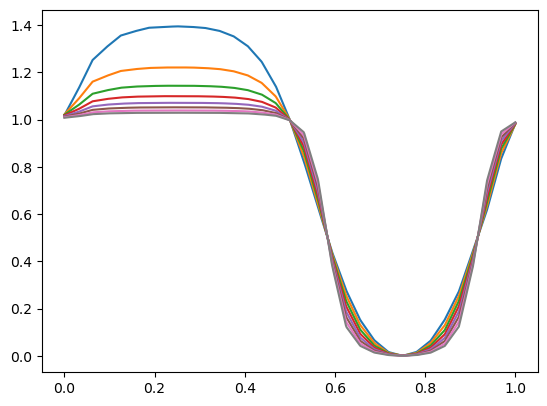

(0.01, 0.03125, 32, 2)


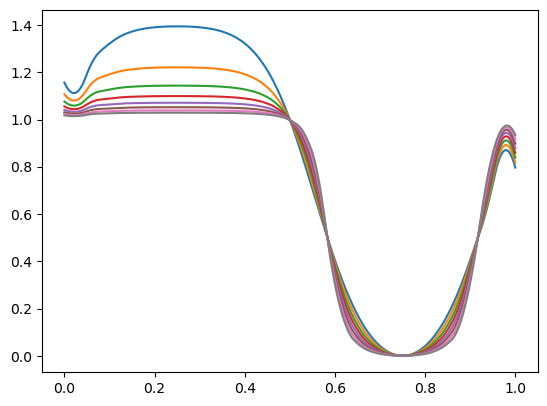

(0.01, 0.03125, 32, 3)


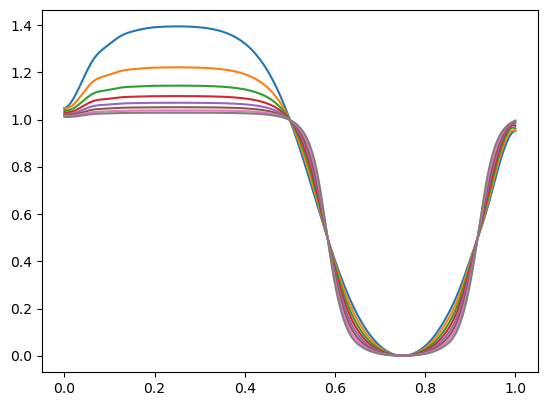

(0.01, 0.03125, 64, 1)


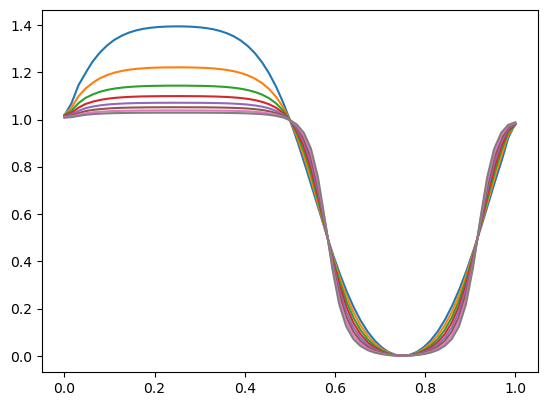

(0.01, 0.03125, 64, 2)


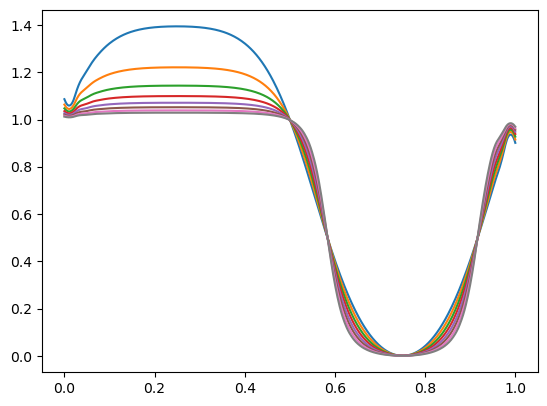

(0.01, 0.03125, 64, 3)


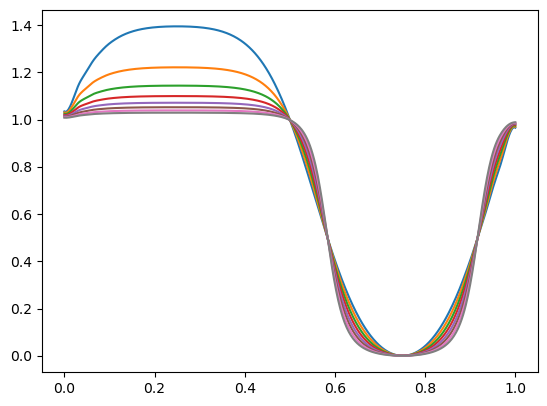

(0.01, 0.03125, 128, 1)


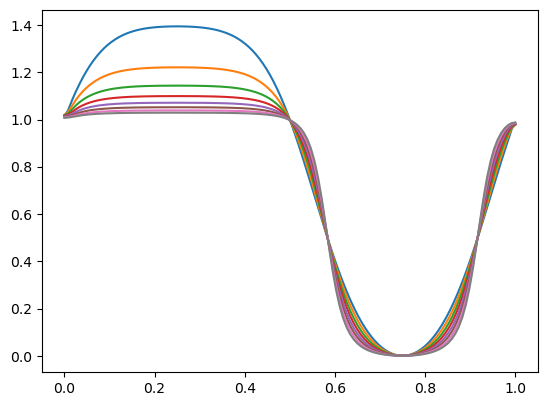

(0.01, 0.03125, 128, 2)


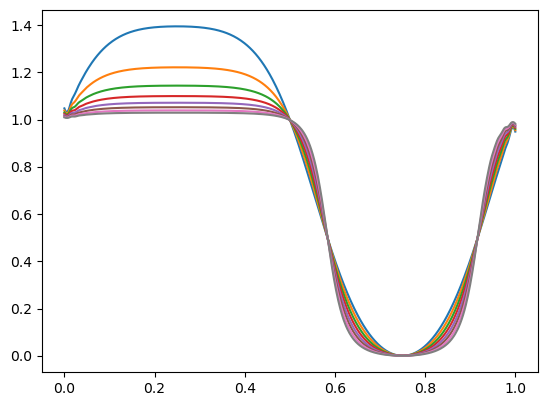

(0.01, 0.03125, 128, 3)


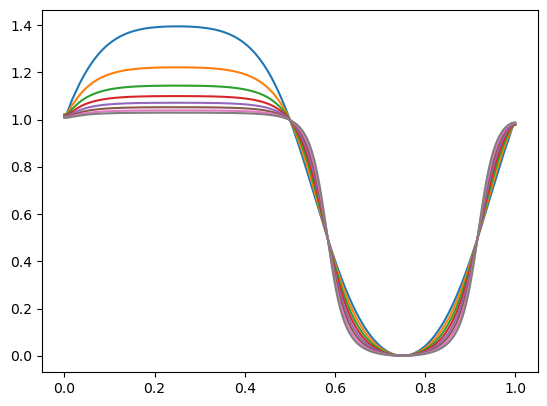

(0.01, 0.015625, 16, 1)


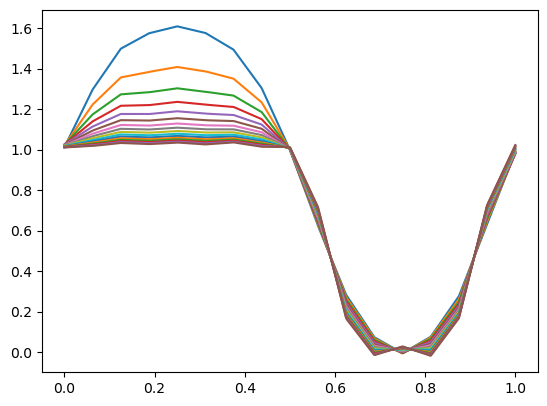

(0.01, 0.015625, 16, 2)


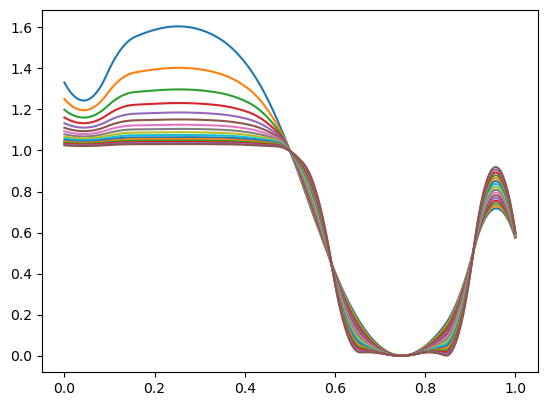

(0.01, 0.015625, 16, 3)


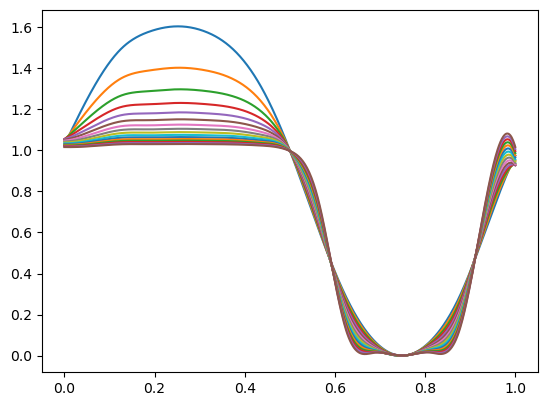

(0.01, 0.015625, 32, 1)


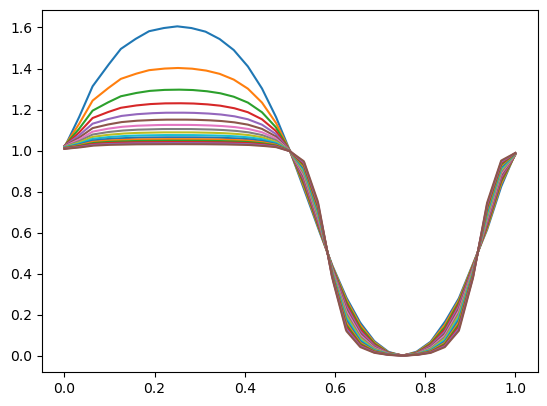

(0.01, 0.015625, 32, 2)


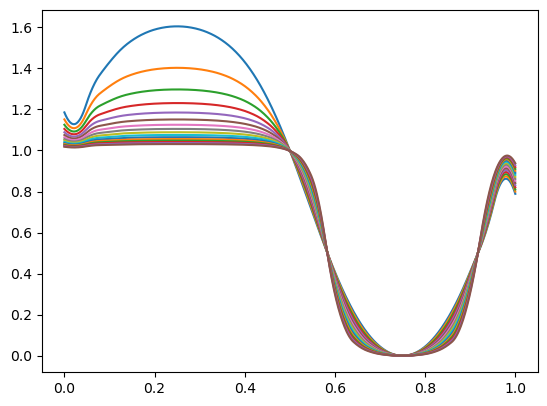

(0.01, 0.015625, 32, 3)


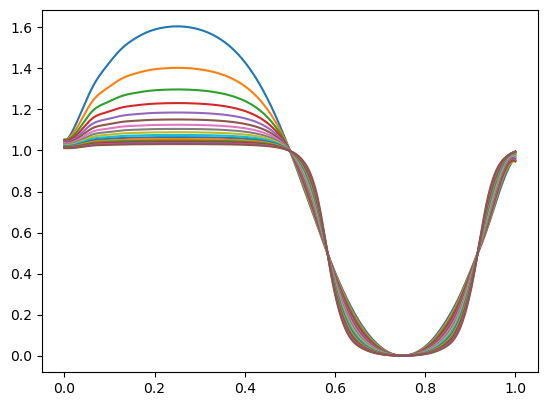

(0.01, 0.015625, 64, 1)


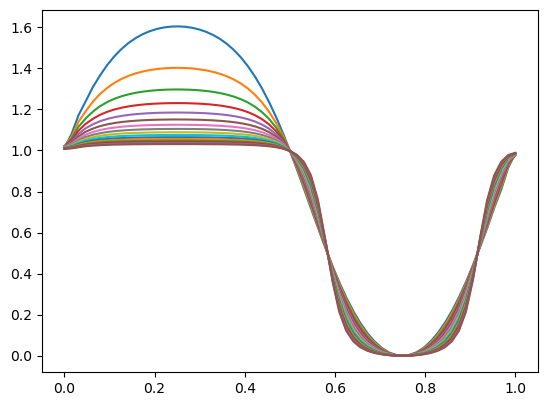

(0.01, 0.015625, 64, 2)


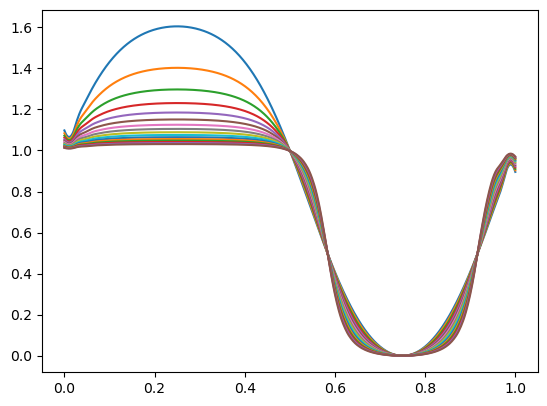

(0.01, 0.015625, 64, 3)


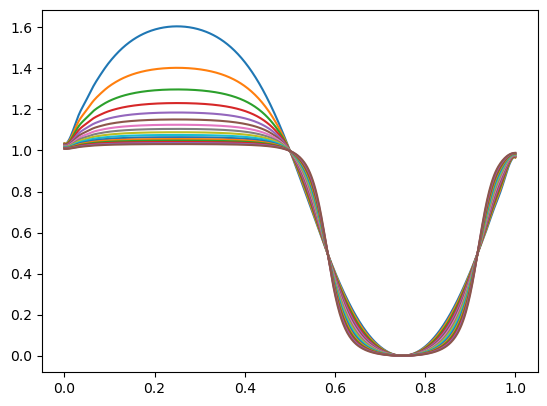

(0.01, 0.015625, 128, 1)


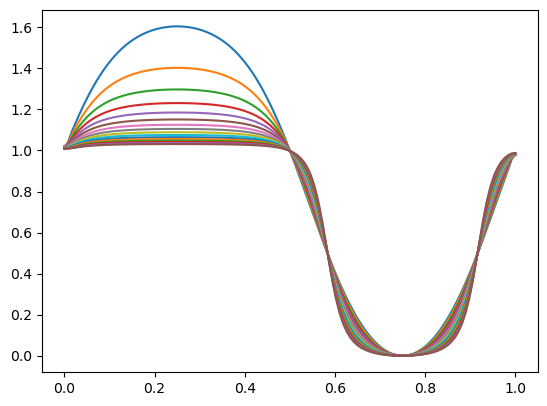

(0.01, 0.015625, 128, 2)


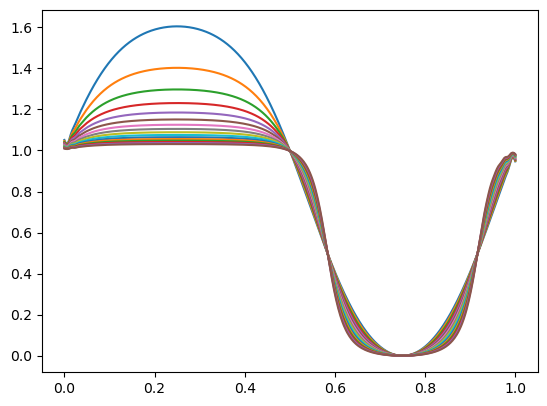

(0.01, 0.015625, 128, 3)


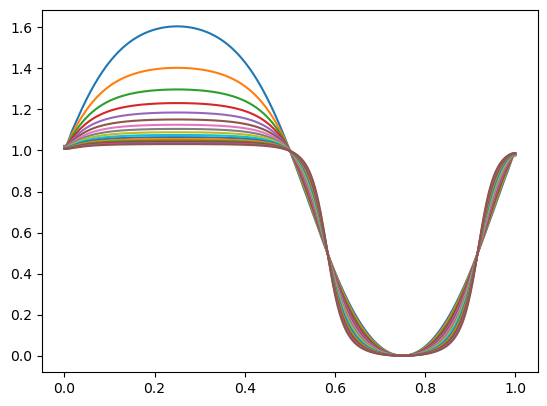

(0.001, 0.25, 16, 1)


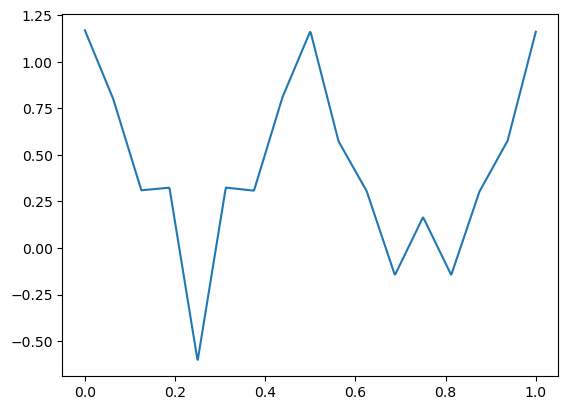

(0.001, 0.25, 16, 2)


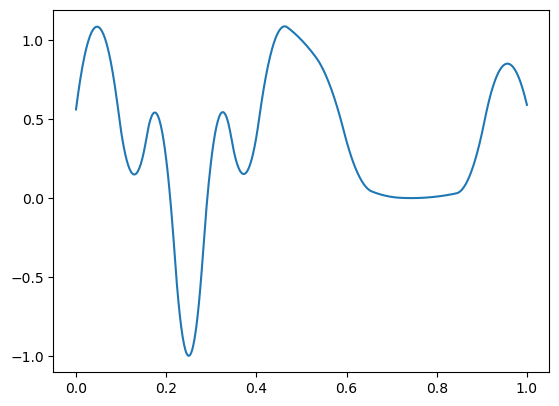

(0.001, 0.25, 16, 3)


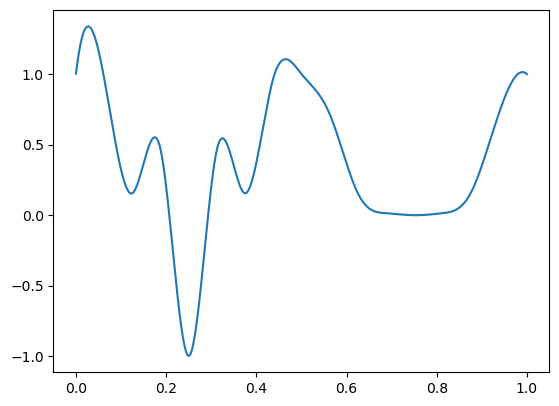

(0.001, 0.25, 32, 1)


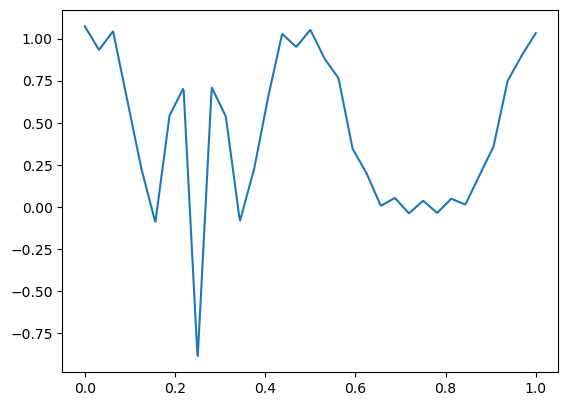

(0.001, 0.25, 32, 2)


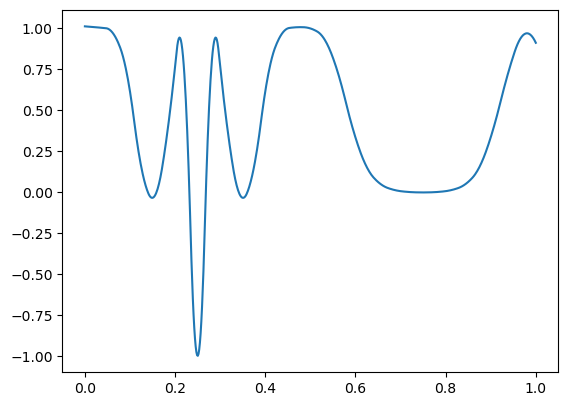

(0.001, 0.25, 32, 3)


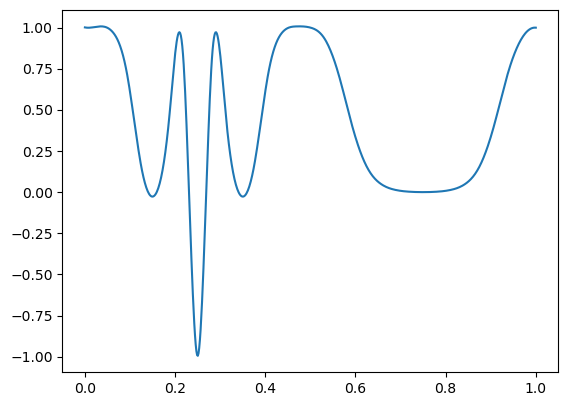

(0.001, 0.25, 64, 1)


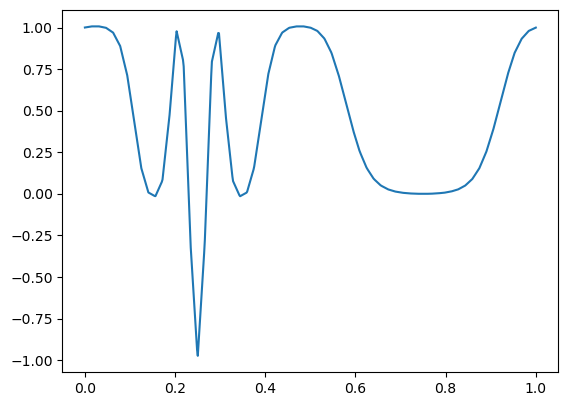

(0.001, 0.25, 64, 2)


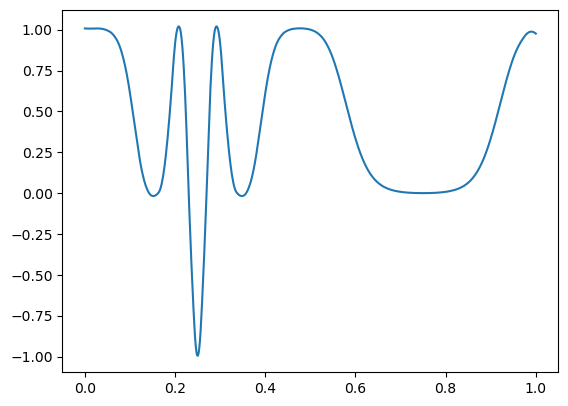

(0.001, 0.25, 64, 3)


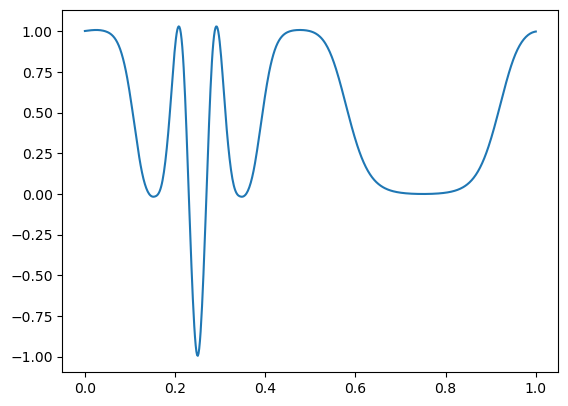

(0.001, 0.25, 128, 1)


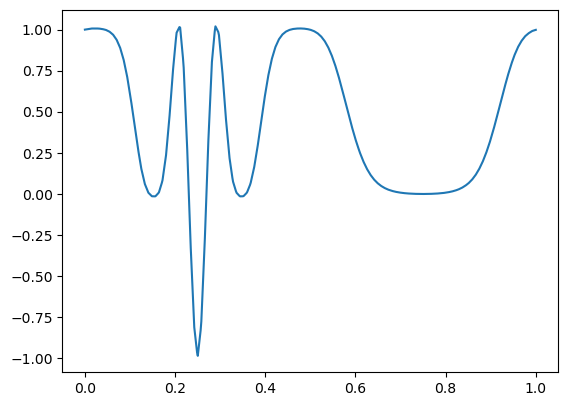

(0.001, 0.25, 128, 2)


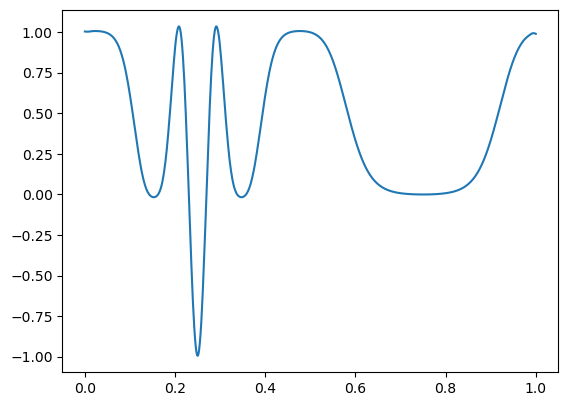

(0.001, 0.25, 128, 3)


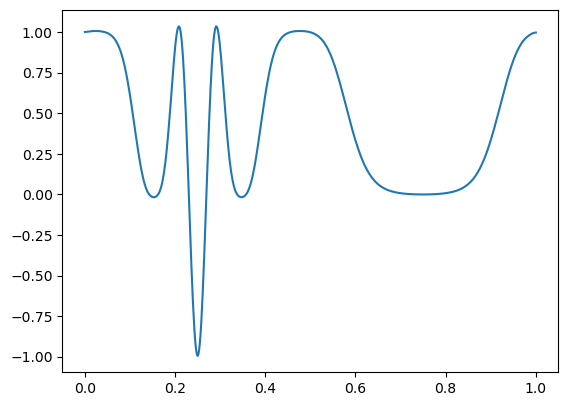

(0.001, 0.125, 16, 1)


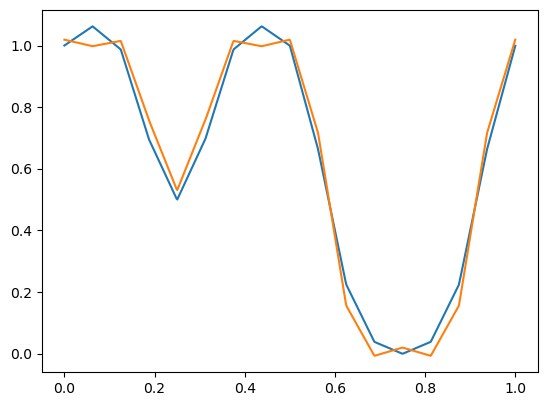

(0.001, 0.125, 16, 2)


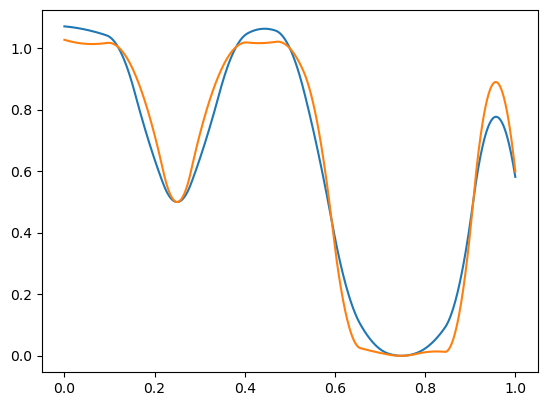

(0.001, 0.125, 16, 3)


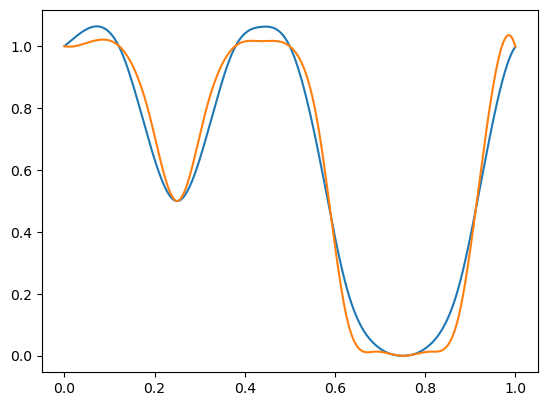

(0.001, 0.125, 32, 1)


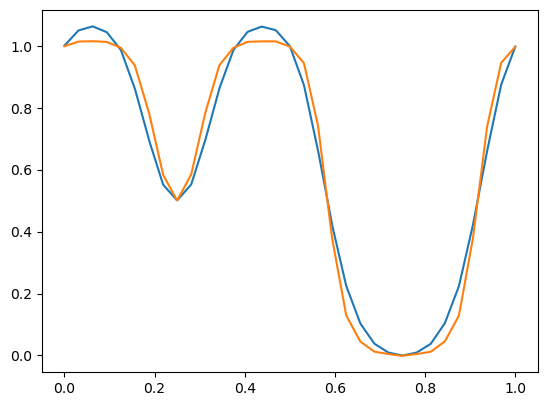

(0.001, 0.125, 32, 2)


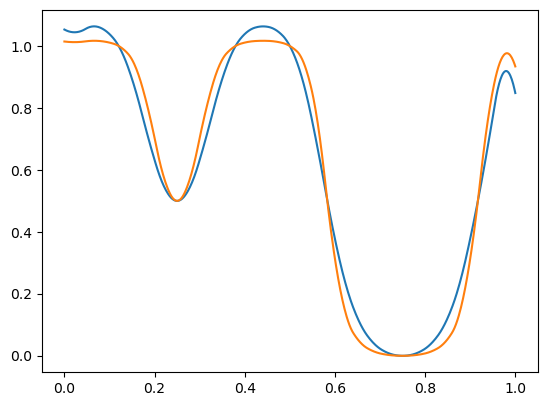

(0.001, 0.125, 32, 3)


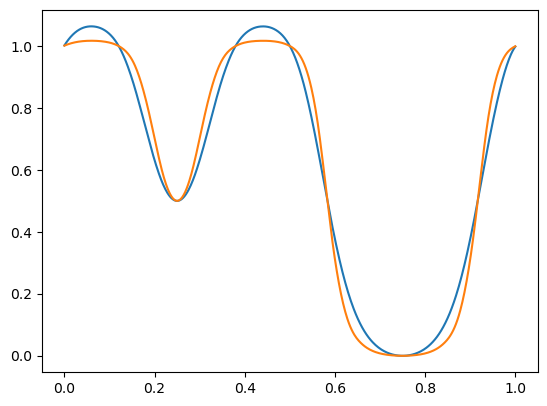

(0.001, 0.125, 64, 1)


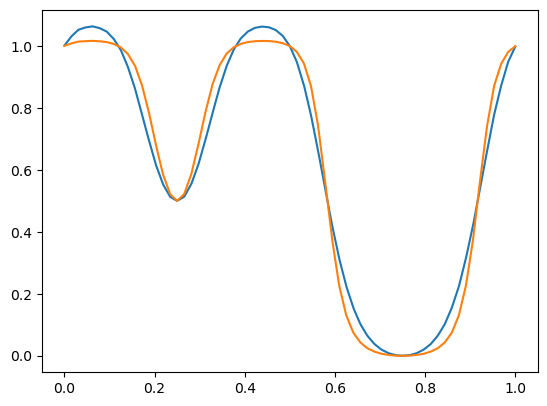

(0.001, 0.125, 64, 2)


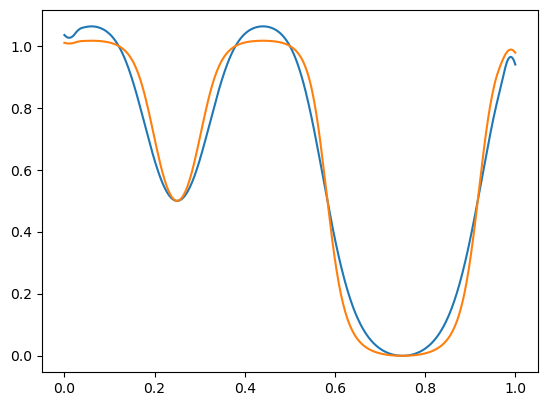

(0.001, 0.125, 64, 3)


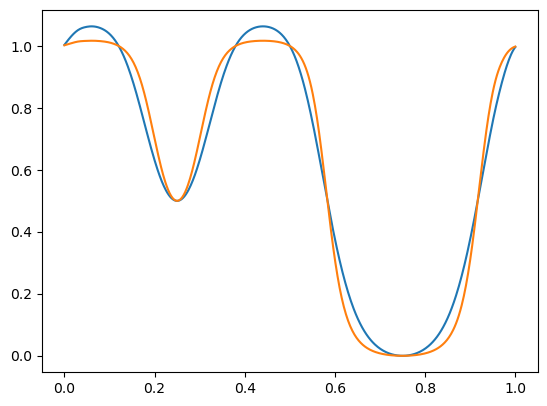

(0.001, 0.125, 128, 1)


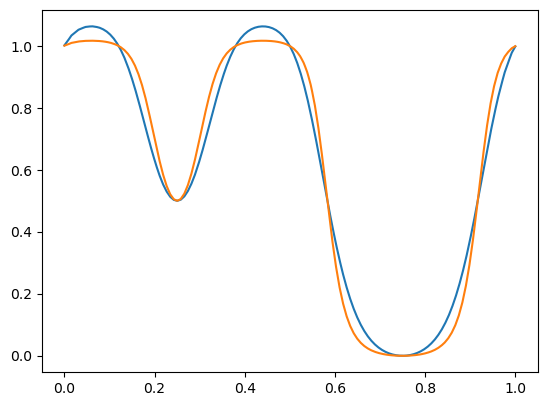

(0.001, 0.125, 128, 2)


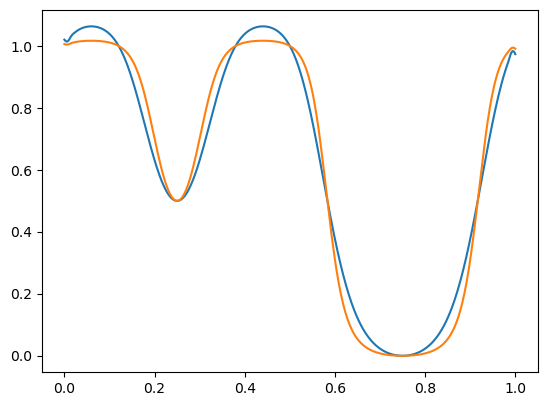

(0.001, 0.125, 128, 3)


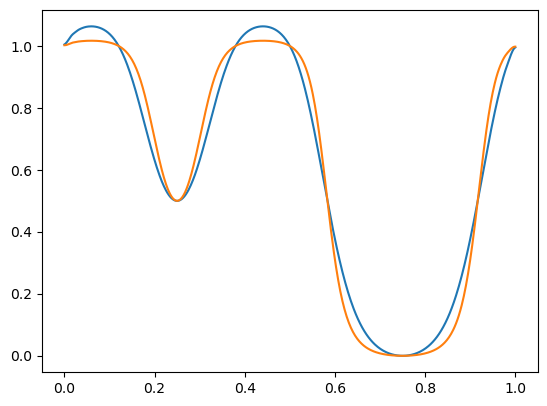

(0.001, 0.0625, 16, 1)


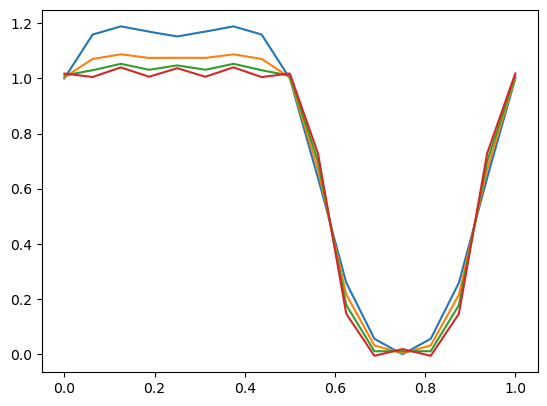

(0.001, 0.0625, 16, 2)


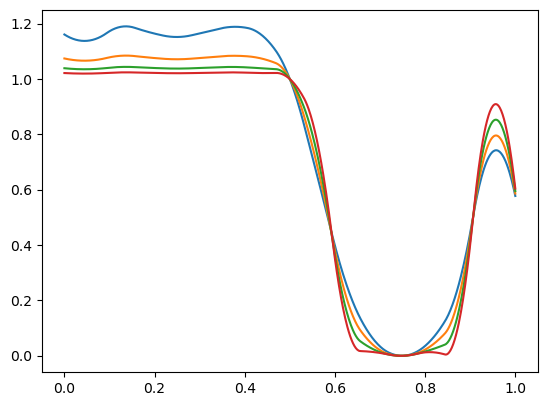

(0.001, 0.0625, 16, 3)


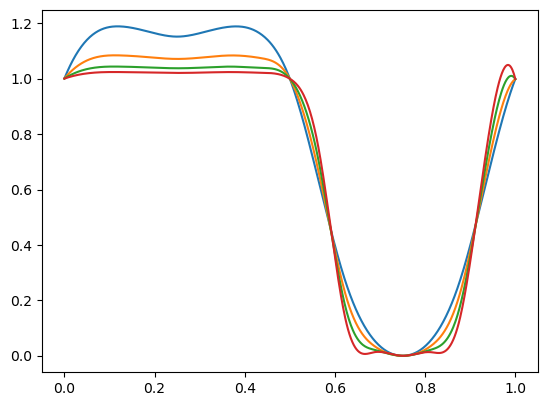

(0.001, 0.0625, 32, 1)


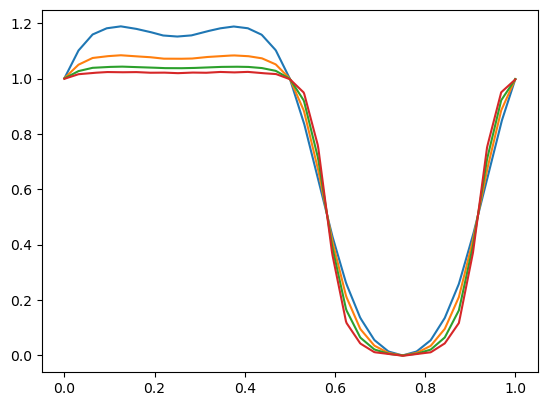

(0.001, 0.0625, 32, 2)


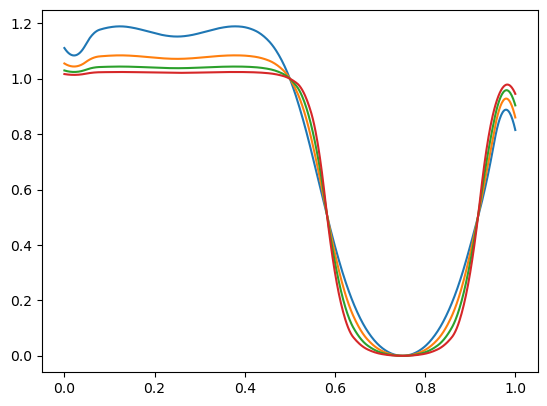

(0.001, 0.0625, 32, 3)


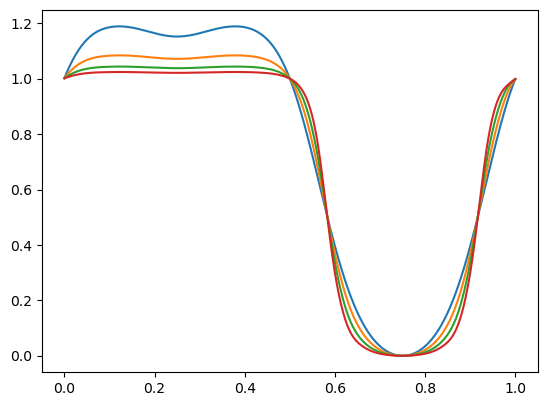

(0.001, 0.0625, 64, 1)


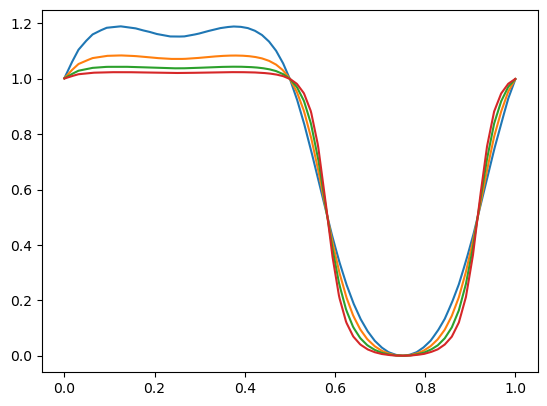

(0.001, 0.0625, 64, 2)


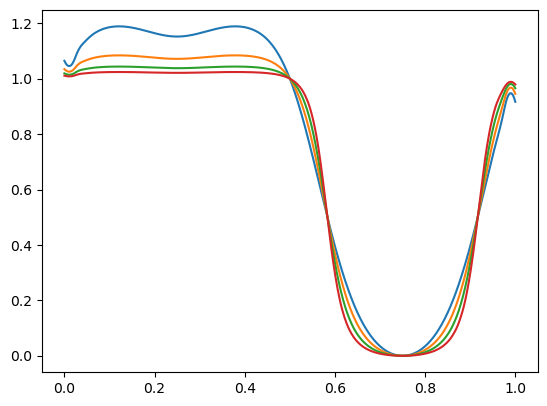

(0.001, 0.0625, 64, 3)


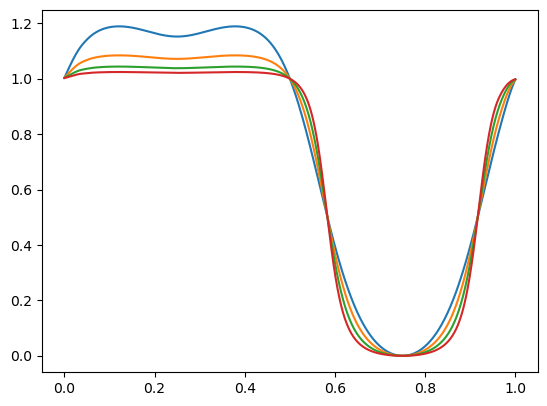

(0.001, 0.0625, 128, 1)


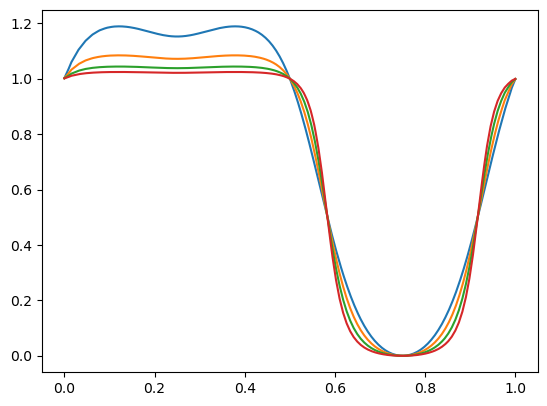

(0.001, 0.0625, 128, 2)


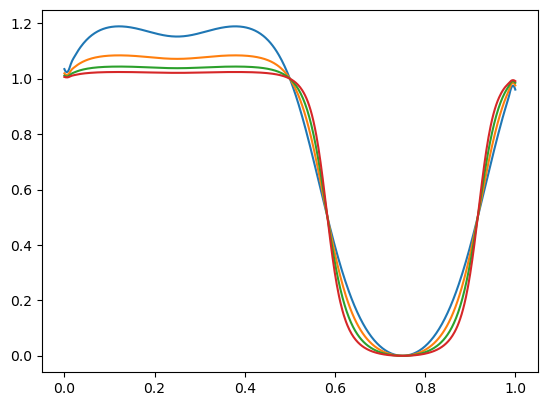

(0.001, 0.0625, 128, 3)


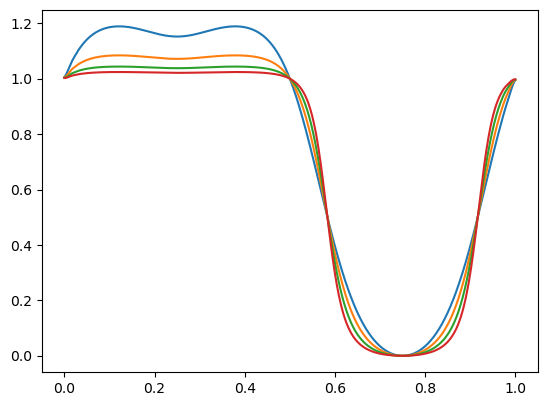

(0.001, 0.03125, 16, 1)


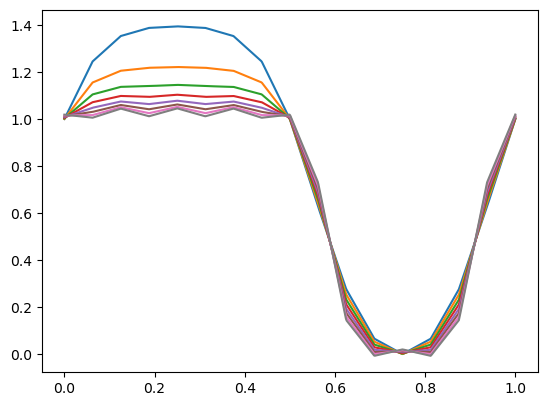

(0.001, 0.03125, 16, 2)


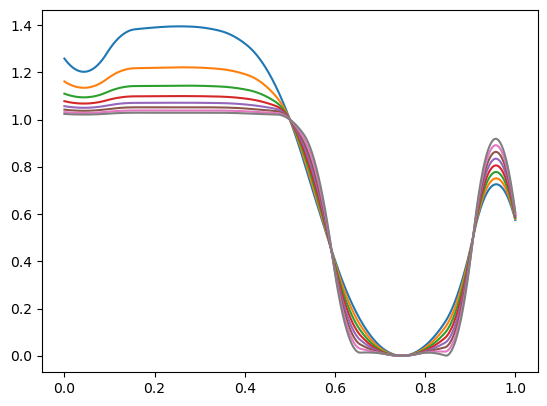

(0.001, 0.03125, 16, 3)


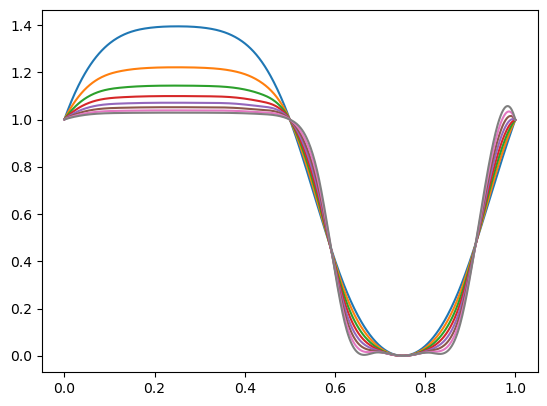

(0.001, 0.03125, 32, 1)


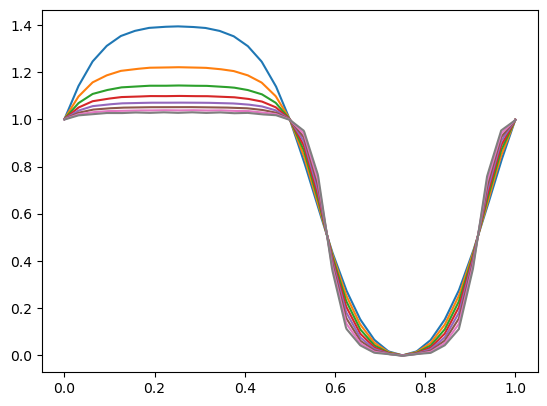

(0.001, 0.03125, 32, 2)


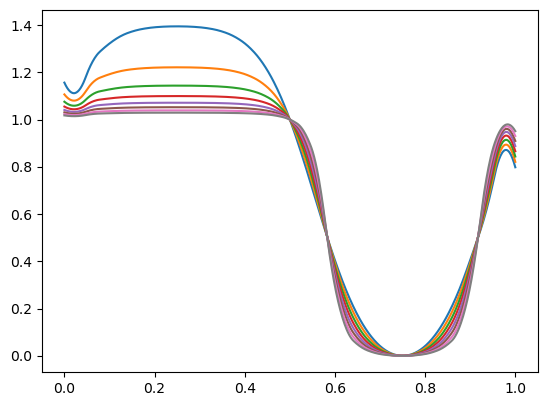

(0.001, 0.03125, 32, 3)


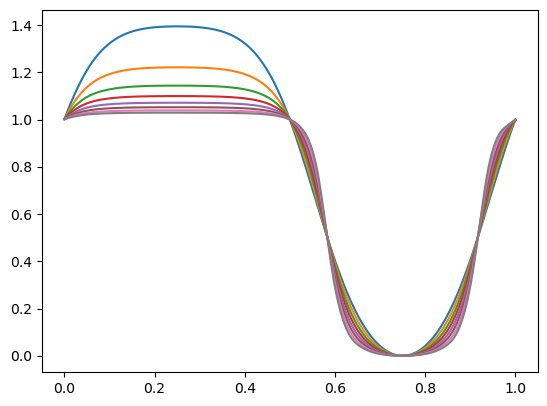

(0.001, 0.03125, 64, 1)


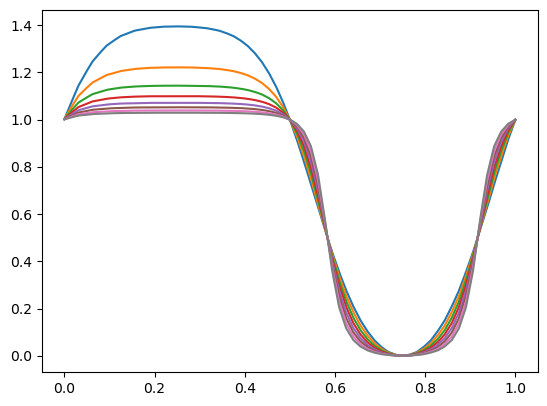

(0.001, 0.03125, 64, 2)


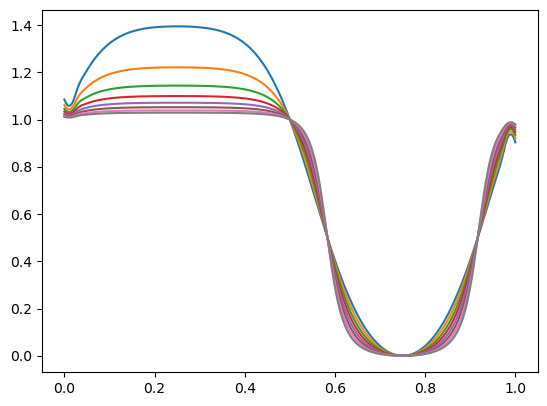

(0.001, 0.03125, 64, 3)


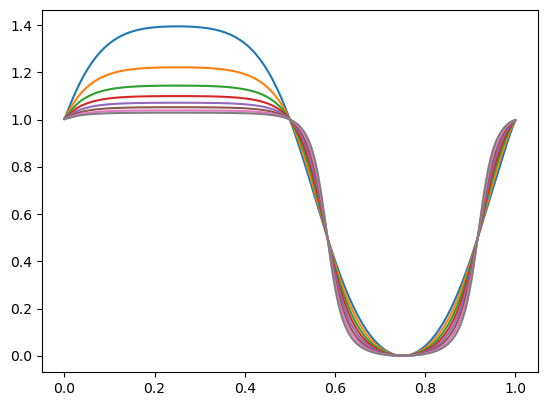

(0.001, 0.03125, 128, 1)


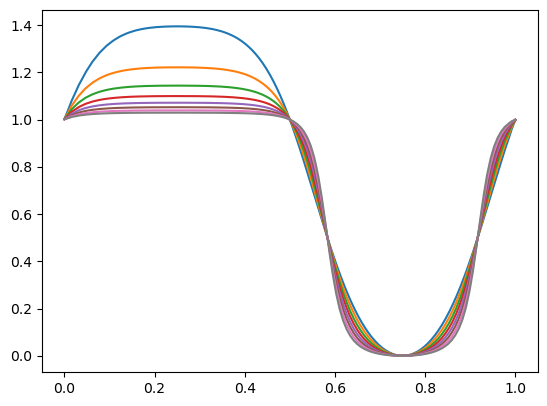

(0.001, 0.03125, 128, 2)


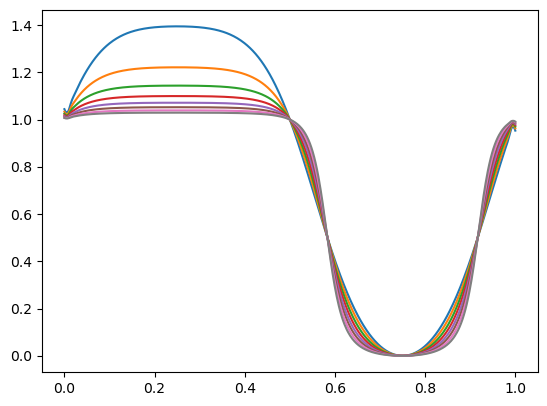

(0.001, 0.03125, 128, 3)


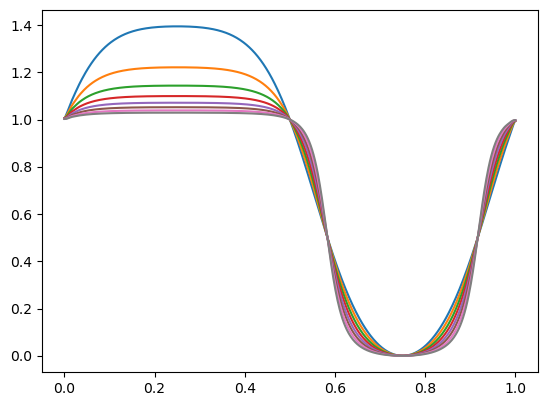

(0.001, 0.015625, 16, 1)


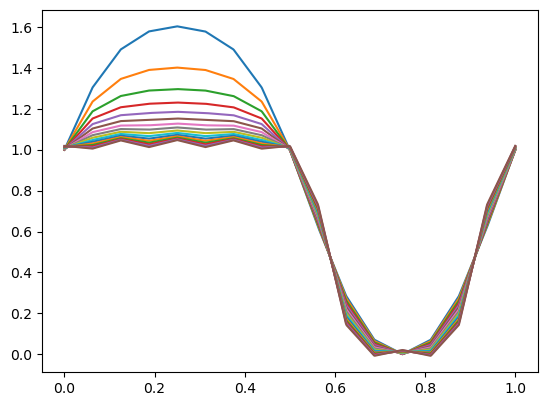

(0.001, 0.015625, 16, 2)


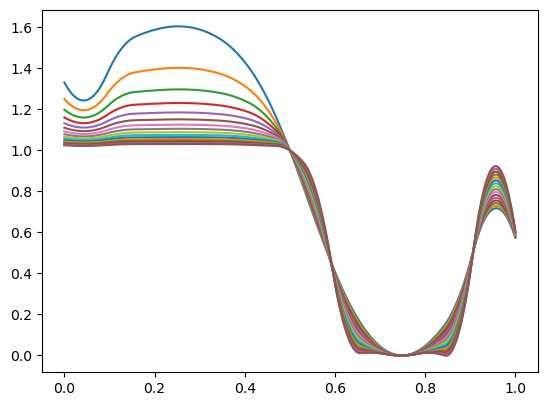

(0.001, 0.015625, 16, 3)


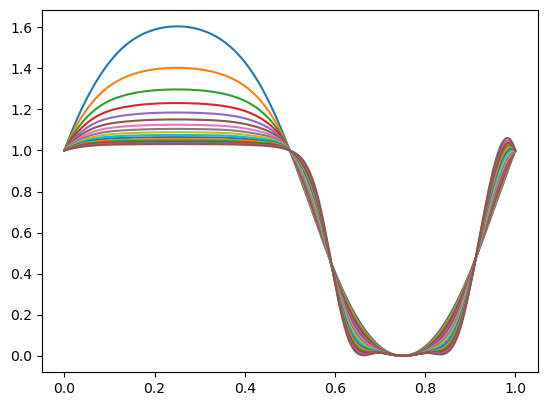

(0.001, 0.015625, 32, 1)


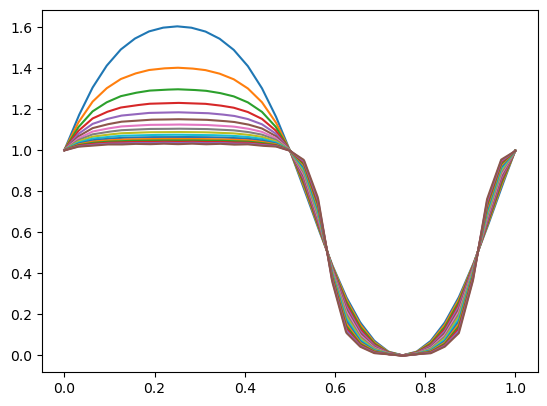

(0.001, 0.015625, 32, 2)


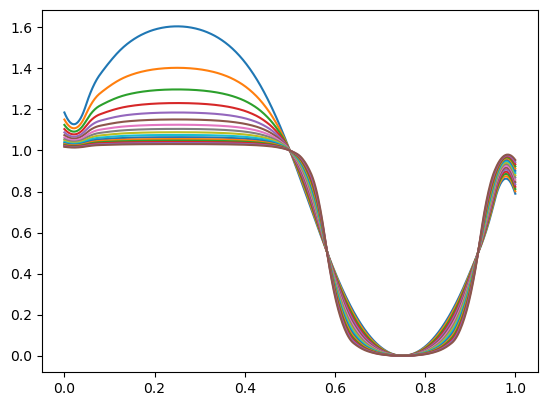

(0.001, 0.015625, 32, 3)


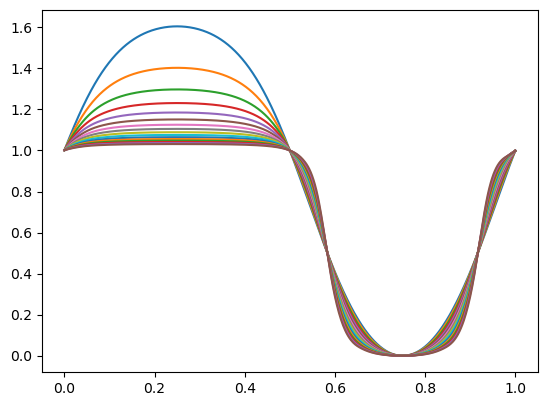

(0.001, 0.015625, 64, 1)


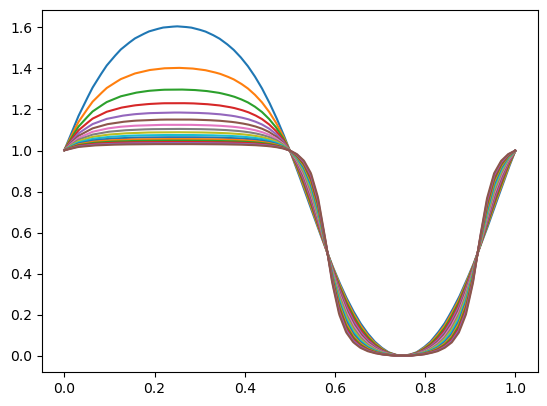

(0.001, 0.015625, 64, 2)


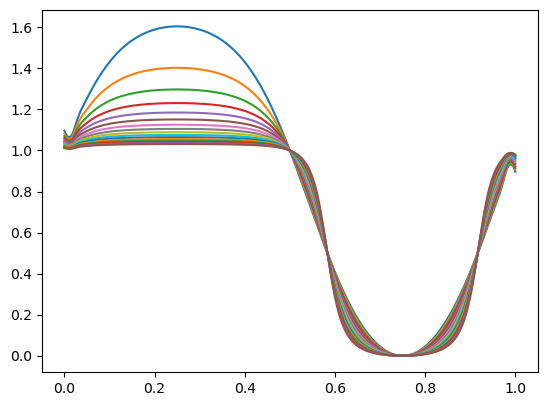

(0.001, 0.015625, 64, 3)


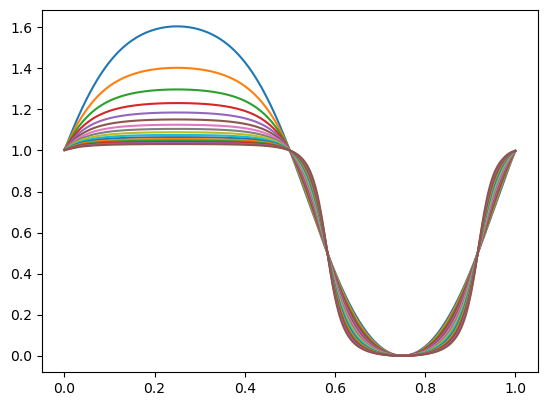

(0.001, 0.015625, 128, 1)


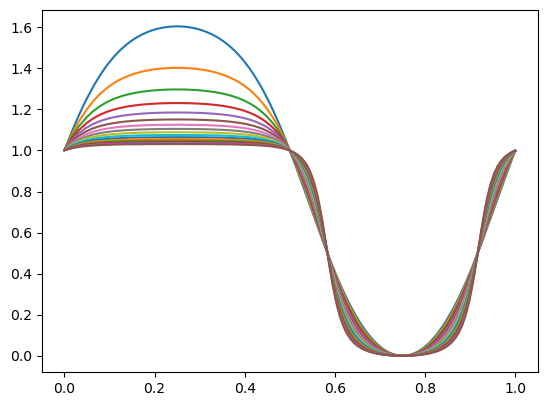

(0.001, 0.015625, 128, 2)


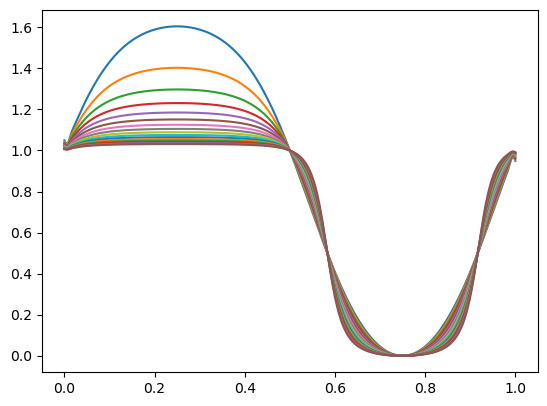

(0.001, 0.015625, 128, 3)


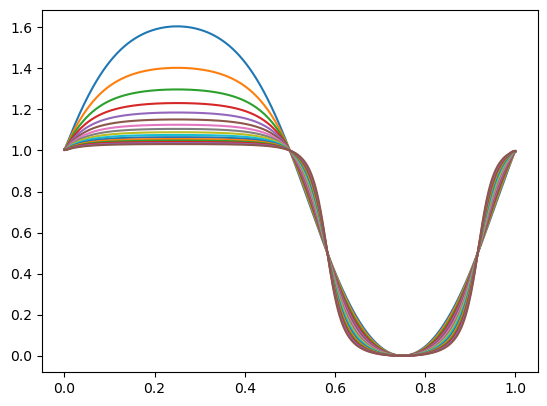

CPU times: user 1min 20s, sys: 821 ms, total: 1min 21s
Wall time: 1min 8s


In [5]:
%%time

# step 3

eps = [0.01, 0.001]
ndofs = [16, 32, 64, 128]
degree = [1, 2, 3]
dt = [.25, .125, .0625, .03125, .015625]
stride = 4
res = 640

def eta0(x):
    return sin(2*pi*x) + 1

for params in product(eps, dt, ndofs, degree):  
    eta, basis = solve_allen_cahan(eta0, *params)
    print(params)
    plot_solution(eta, basis, stride, res)
    show()


# What do you observe? What happens when you increase ndofs and keep dt constant?

Increasing `ndofs` at fixed $\delta t$ makes the approximate solution at $t = 1$ smoother, but not necessarily _closer_ to the real one. Indeed, for $\delta t$ small enough ($\delta t \leq 0.125$) the shape of the solution is distorted, no matter the choice of the other parameters (at least, amongst the combinations of suggested values).